# Algorithme K-Means

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
def find_cluster(instance, centroids): 
    return np.argmin([np.linalg.norm(centroid - instance) for centroid in centroids])

def kmeans(k, instances):
    
    n_instances, n_features = instances.shape

    centroids = np.array(instances[np.random.choice(n_instances, k)])
    centroids_history = []
    
    modified = True
    while modified:
        centroids_history.append(centroids)
        
        clusters = {i : [] for i in range(k)} 
        
        for instance in instances:
            cluster = find_cluster(instance, centroids)
            clusters[cluster].append(instance)
        
        new_centroids = np.zeros(centroids.shape)
        for i in range(k):
            clusters[i] = np.array(clusters[i])
            new_centroids[i] = np.mean(clusters[i], axis=0) 

        if np.array_equal(new_centroids, centroids):
            modified = False
        
        centroids = new_centroids
    
    return centroids, centroids_history, clusters

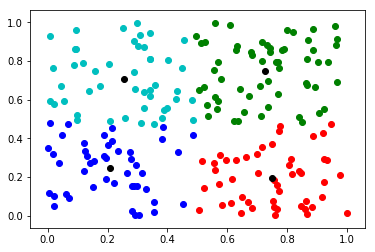

In [97]:
#Initialisation de 200 instances possédant chacune 2 features de manière aléatoire
n_instances = 200
n_features = 2
instances = np.random.random((n_instances, n_features))

#Nous cherchons à former 4 clusters
k = 4

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

centroids, centroids_history, clusters = kmeans(k, instances)
for cluster_idx in range(k):
    plt.scatter(clusters[cluster_idx][:, 0], clusters[cluster_idx][:, 1], color=colors[cluster_idx])
    
plt.scatter(centroids[:, 0], centroids[:, 1], color='k')